In [ ]:
# ..... look at clusters from different algos ..... #

In [2]:
library(Seurat)
library(ggplot2)
library(data.table)
library(dplyr)

In [65]:
# Qiu marker sets for main subtypes
neuron_markers = c('OTX2', 'PAX6', 'PAX2', 'PAX5', 'EOMES', 'SLC17A6', 'GAD1', 'SLC32A1', 'NEUROD1', 'SOX10')

meso_markers = c('PAX3', 'PAX7', 'PAX1', 'PAX9', 'TBX6', 'TBX5', 'HCN4', 'GATA4', 'MYF5')

endo_markers = c('KDR', 'CDH5', 'PECAM1')

epi_markers = c('CDH3', 'TRP63', 'TFAP2B', 'EGFR', 'KRT5', 'KRT14')

ery_markers = c('TSPAN8', 'SNCA', 'HBB-BS', 'ABCB4', 'SLC4A1', 'KEL', 'CD36', 'GYPA', 'HBB-BH1', 'HBA-A1',
               'HBA-X', 'HBB-Y', 'ZFPM1', 'HBZ')

wbc_markers = c('MS4A4A', 'APOE', 'LYZ2', 'SELENOP', 'PTPRC', 'LY86', 'CD34')

lung_markers = c('FOXP2', 'MKI67', 'ETV5', 'NKX2-1')

b_t_mast_markers = c('CD3E', 'CD4', 'CD8A', 'CD19', 'CD27', 'PTPRC', 'KIT', 'CD200R3')

megak_markers = c('PF4', 'ITGB3', 'ITGA2B', 'CD226')

In [67]:
# list of stages and samples
stages = rep(c('stage14', 'stage17', 'stage21'), each = 3)
samples = paste0('sample', c('4', '7', '8A', '3_Triangle', '5B', '5Y', '1A', '1B', '2'))
samples

[1] "sample4"          "sample7"          "sample8A"         "sample3_Triangle"
[5] "sample5B"         "sample5Y"         "sample1A"         "sample1B"        
[9] "sample2"

In [140]:
# load data
id = 9
sc1 = readRDS(paste0(stages[id], '_', samples[id], '_data.rds'))
sc1$dataset = paste0('s', sub('\\.*sample', '', samples[id]))

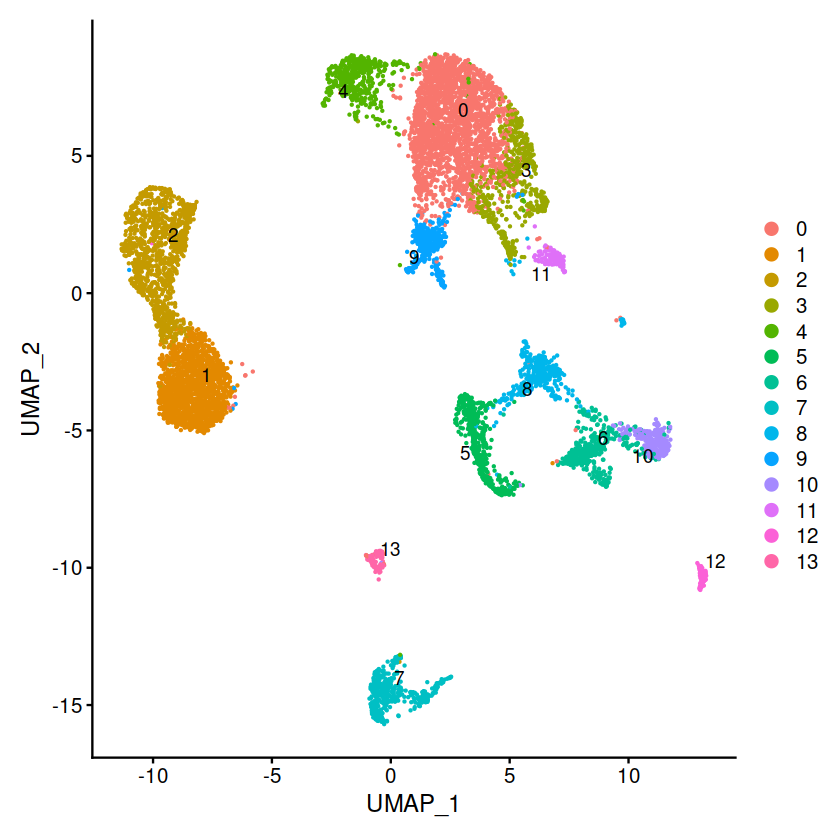

In [141]:
plot <- DimPlot(sc1)
LabelClusters(plot, id = 'ident')

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: HBB-BS, ABCB4, GYPA, HBB-BH1, HBA-A1, HBA-X, HBB-Y, HBZ”


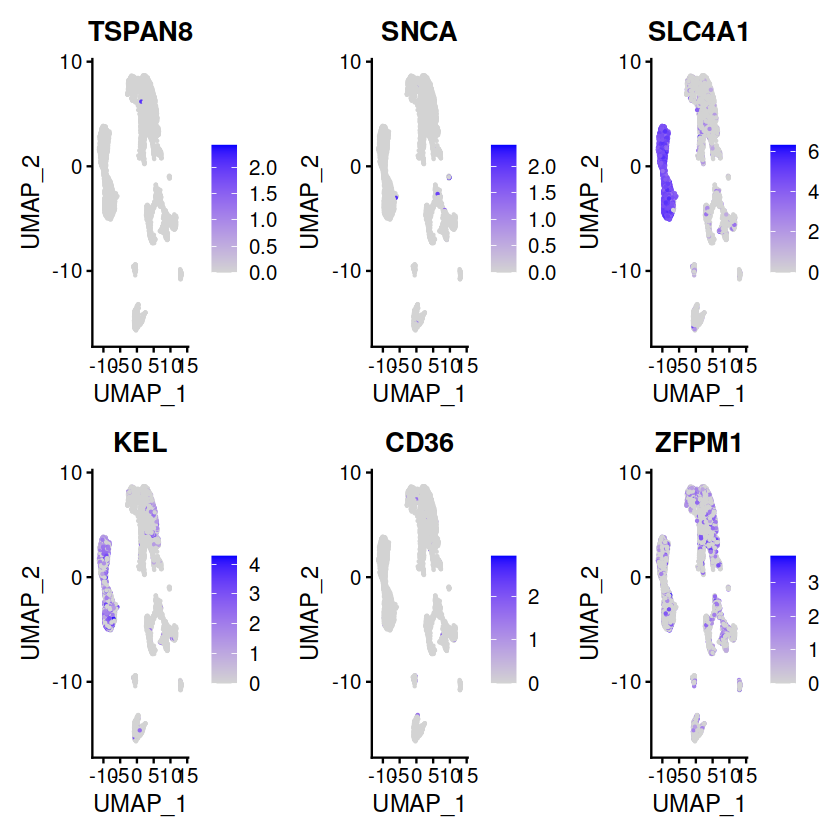

In [142]:
FeaturePlot(sc1, features = ery_markers, ncol = 3)

In [143]:
load(paste0(stages[id], '_', samples[id], '_clusters_SHC.Rdata'))
sc1$shc_clusters = clusters[[1]]

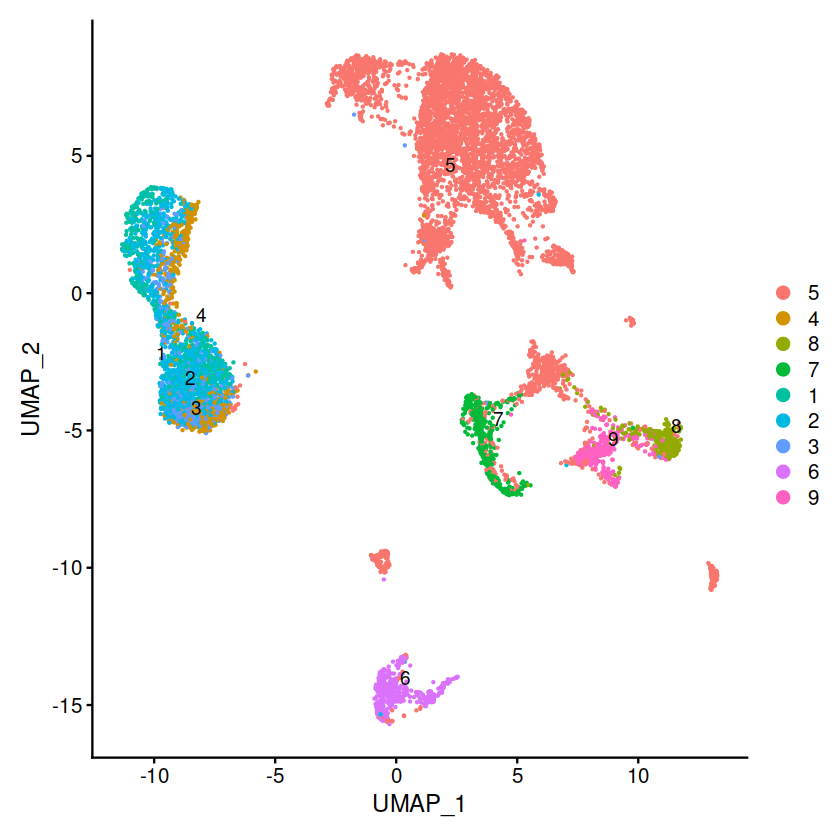

In [144]:
Idents(sc1) = 'shc_clusters'
plot <- DimPlot(sc1)
LabelClusters(plot, id = 'ident')

In [145]:
m1 = read.delim(paste0(stages[id], '_', samples[id], '_Qiu_E11.5_celltypes.csv'), sep = ',')
sc1$Qiu = m1$class[match(colnames(sc1), m1$barcode)]
m1[1,]

barcode                            class   
1 stage21_sample2_AAACCCAAGCAAATGT-1 Mesoderm
  celltype                               
1 Lateral plate and intermediate mesoderm
  final_celltype                         
1 Lateral plate and intermediate mesoderm

In [149]:
ccs = 4
table(sc1$Qiu[sc1$shc_clusters %in% ccs])
# table(sc1$Qiu[sc1$seurat_clusters %in% c(2,3)])


       Cardiomyocytes  Definitive_erythroid           Endothelium 
                    3                   142                     1 
     Epithelial_cells         Eye_and_other       Lung_and_airway 
                    1                     1                     2 
           Mast_cells        Megakaryocytes              Mesoderm 
                    2                     4                     4 
         Muscle_cells Neural_crest_PNS_glia   Primitive_erythroid 
                    4                     4                   384 
           unassigned 
                    1 